In [1]:
import ROOT
# %jsroot on
%load_ext autoreload
%autoreload 2
from utils import HistCollection as HC
import plotter

Welcome to JupyROOT 6.08/02


In [2]:
rebuild_hists=False
hists_TTTT = HC("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root", rebuild_hists=rebuild_hists)
hists_TTZ = HC("TTZ", "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root", rebuild_hists=rebuild_hists)
hists_TTW = HC("TTW", "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root", rebuild_hists=rebuild_hists)

collection added: TTTT
collections present: TTTT
collection added: TTZ
collections present: TTTT, TTZ
collection added: TTW
collections present: TTTT, TTZ, TTW


In [3]:
for id_, count in list(hists_TTTT.GenTop_pdg_id):
    print(id_,"=>",count)

6 => 23966


cannot draw object <ROOT.map<int,int> object at 0x4ed7310>


Warning in <TROOT::Append>: Replacing existing TH1: TTTT:nLepvsnJet (Potential memory leak).


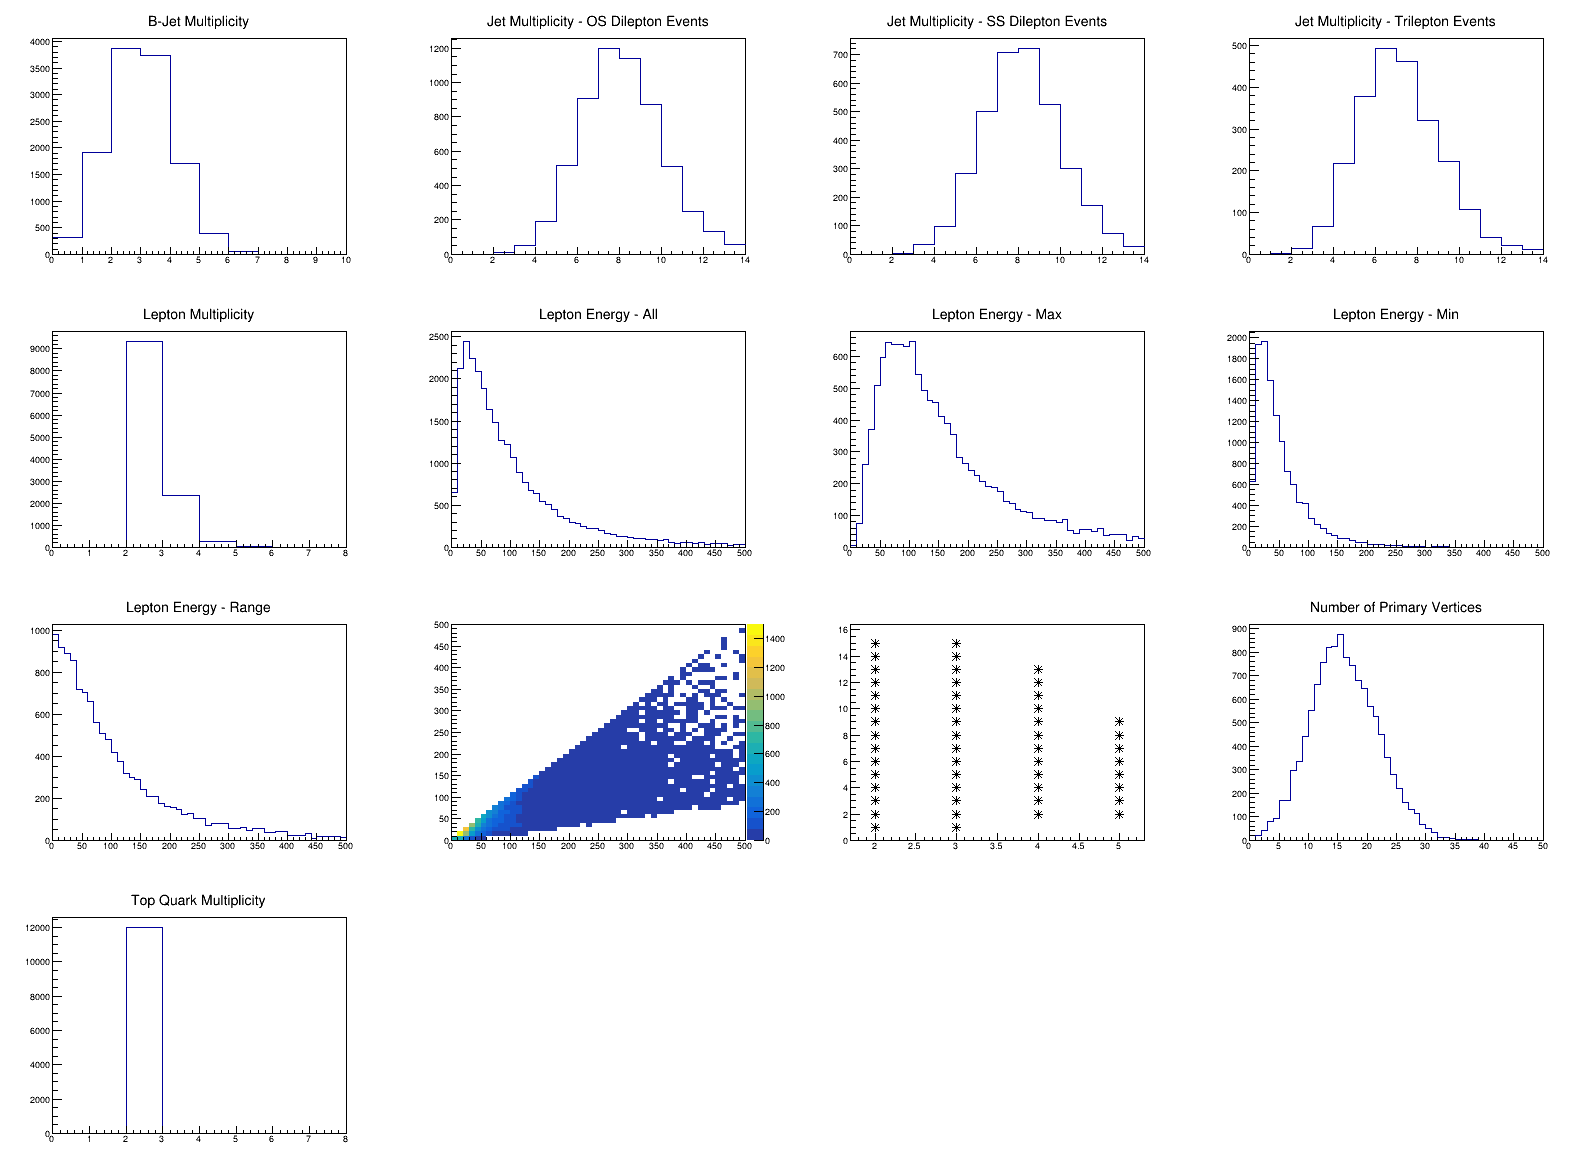

In [4]:
hists_TTTT.draw()

cannot draw object <ROOT.map<int,int> object at 0x5044140>


Warning in <TROOT::Append>: Replacing existing TH1: TTZ:nLepvsnJet (Potential memory leak).


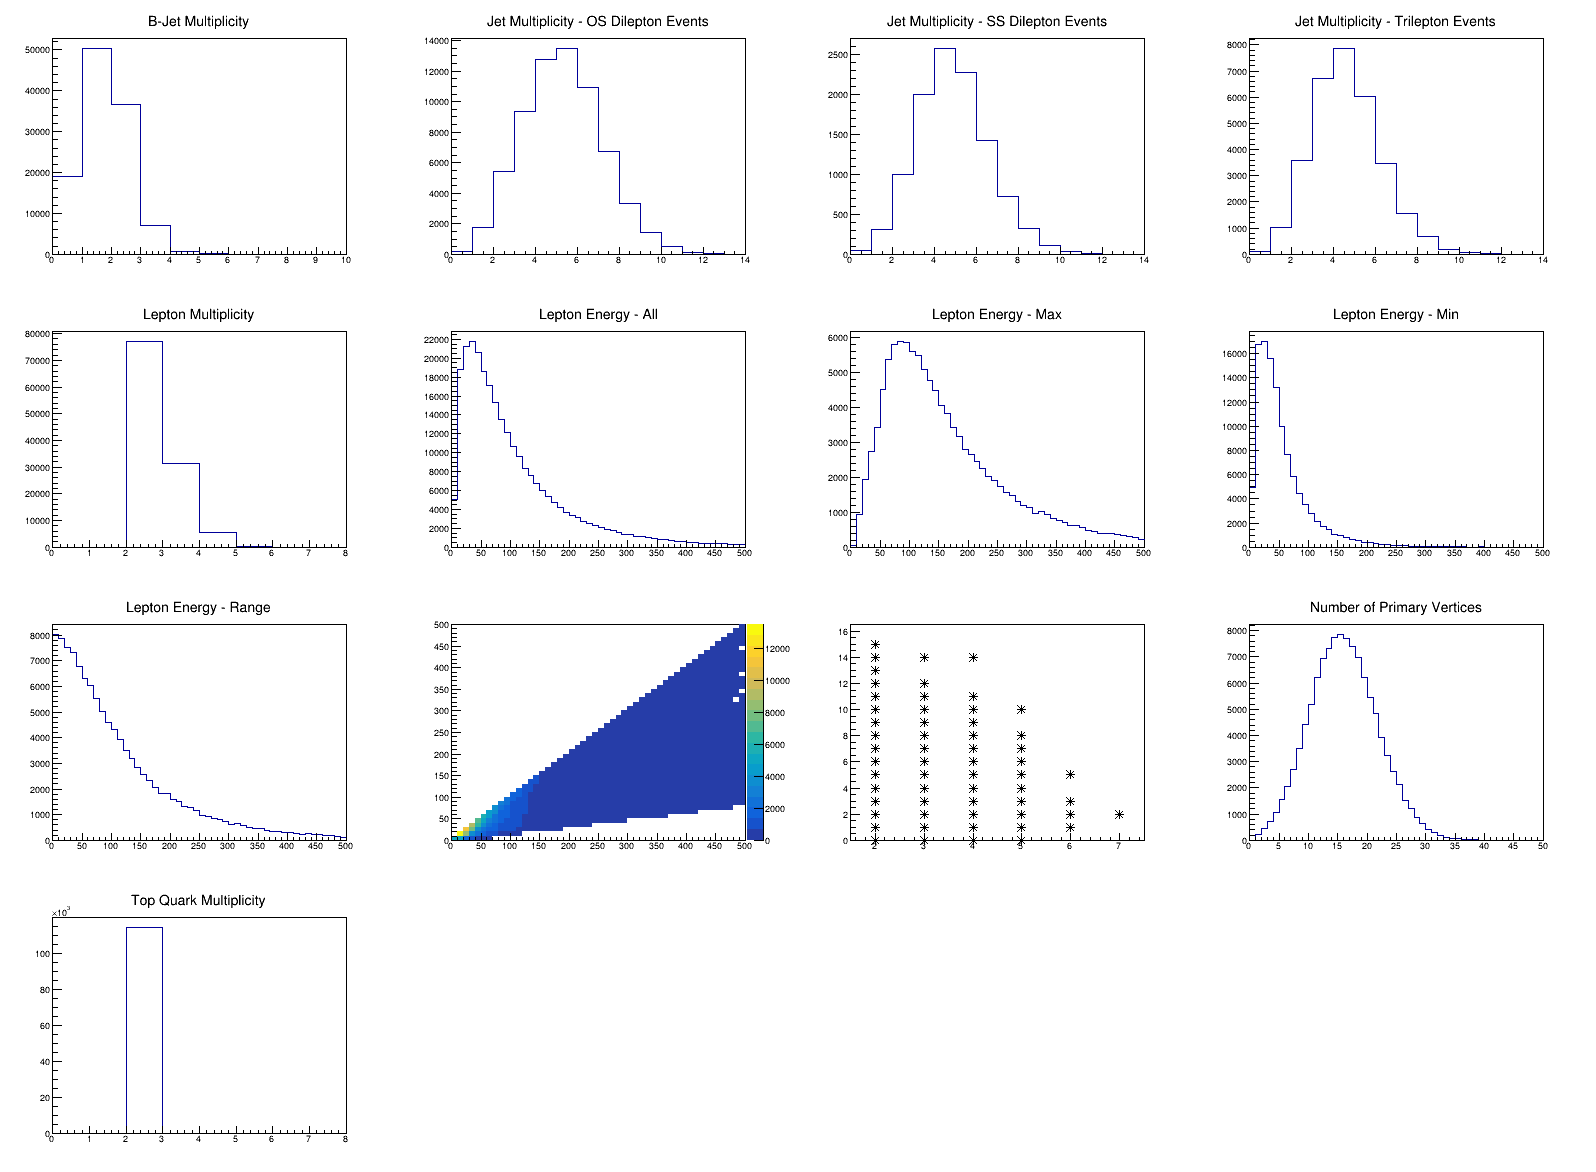

In [5]:
hists_TTZ.draw()

Warning in <TROOT::Append>: Replacing existing TH1: TTW:nLepvsnJet (Potential memory leak).


cannot draw object <ROOT.map<int,int> object at 0x5053400>


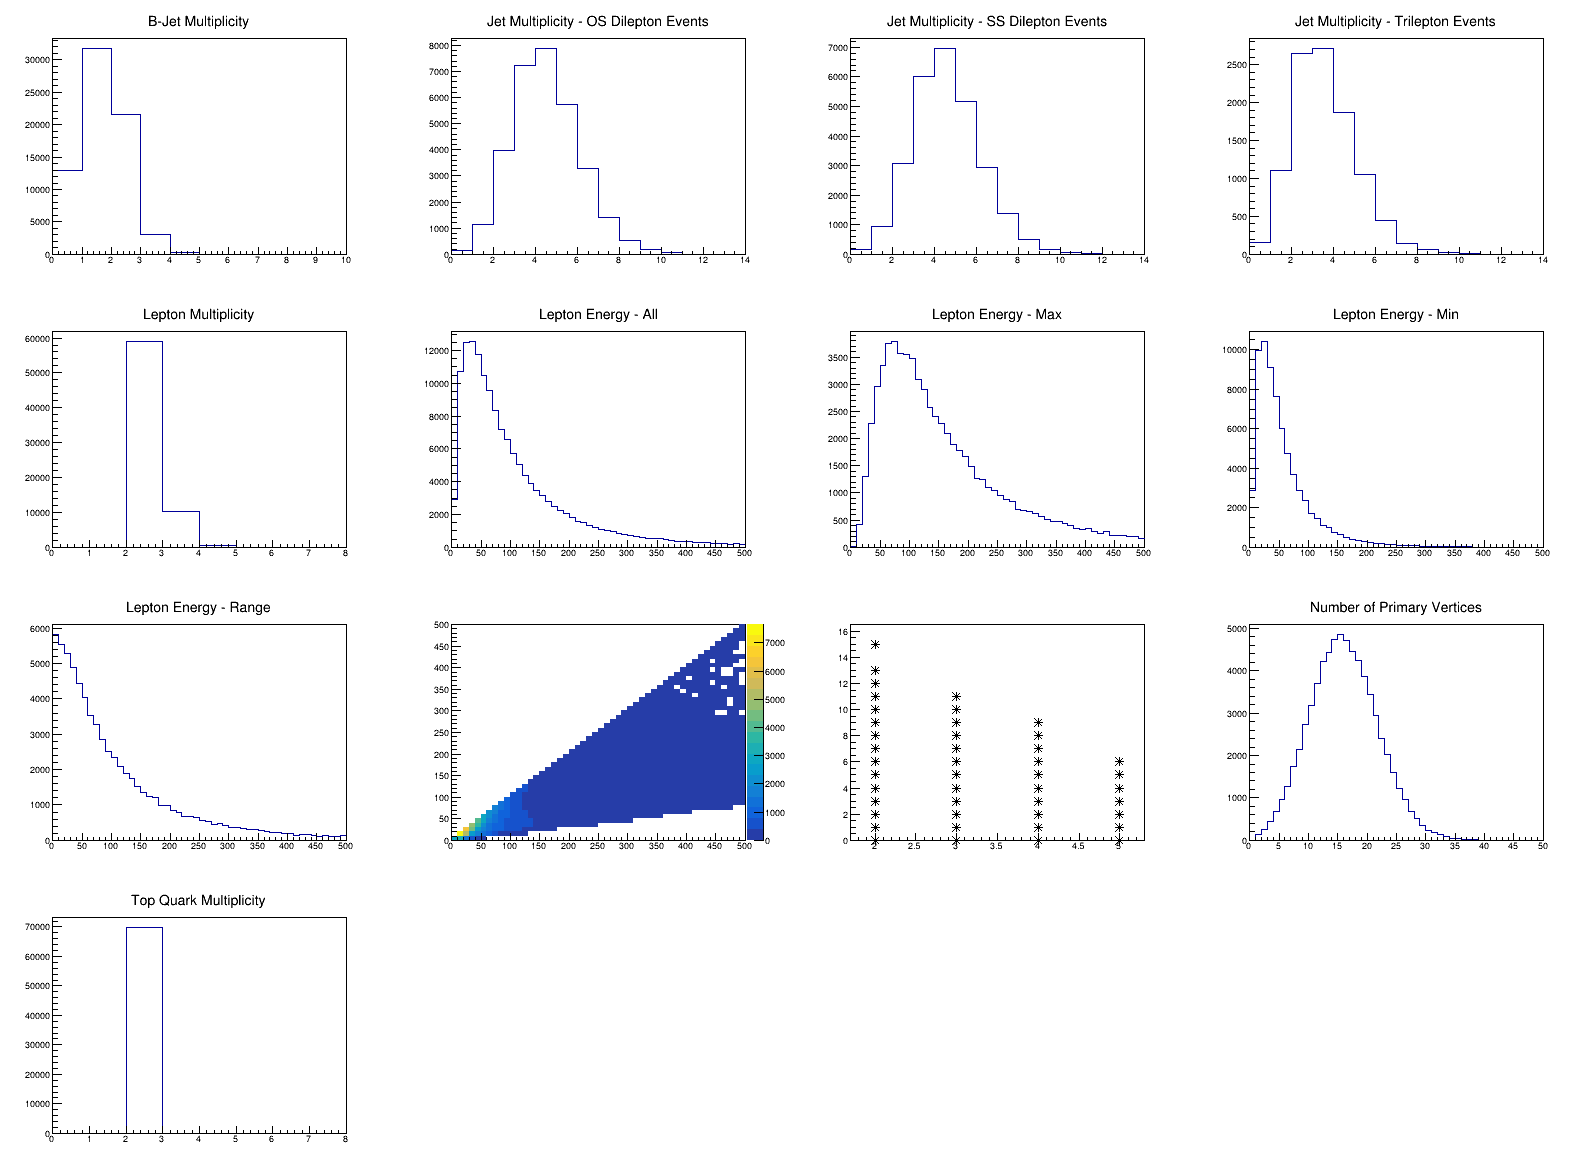

In [6]:
hists_TTW.draw()

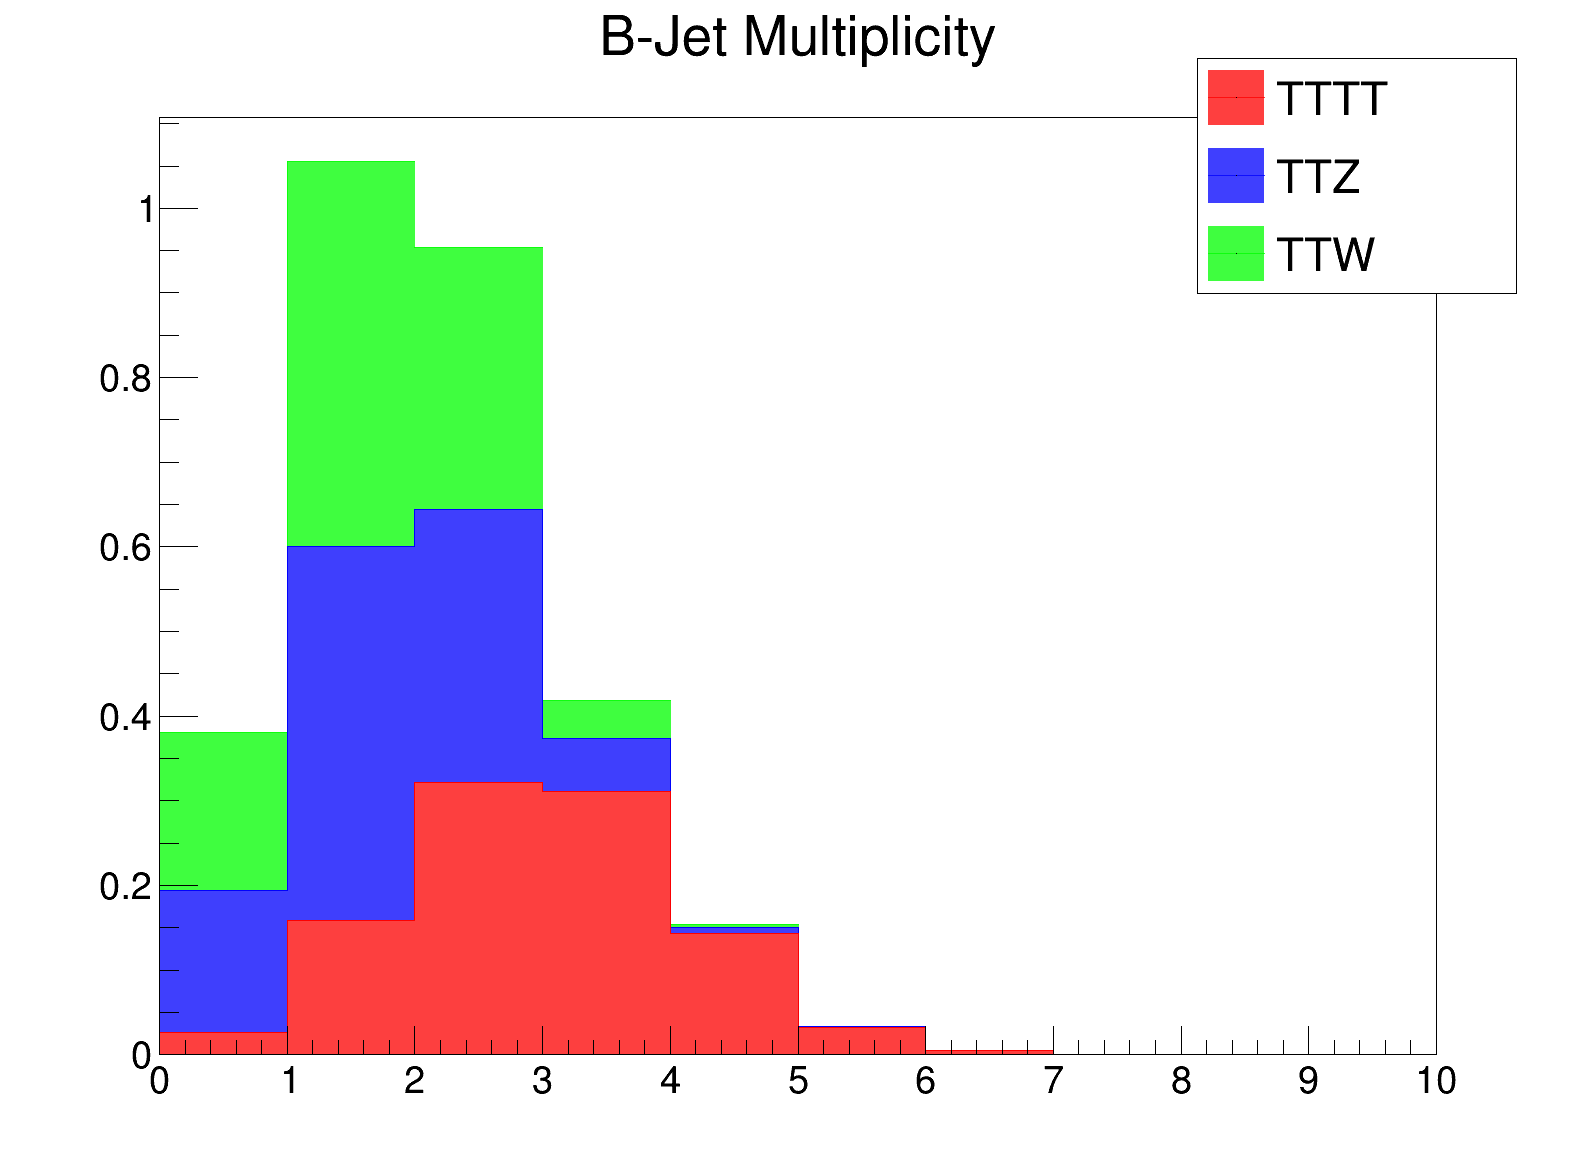

In [11]:
HC._canvas.Clear()
HC.stack_hist("b_jet_count", title="B-Jet Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)
HC._canvas.Draw()

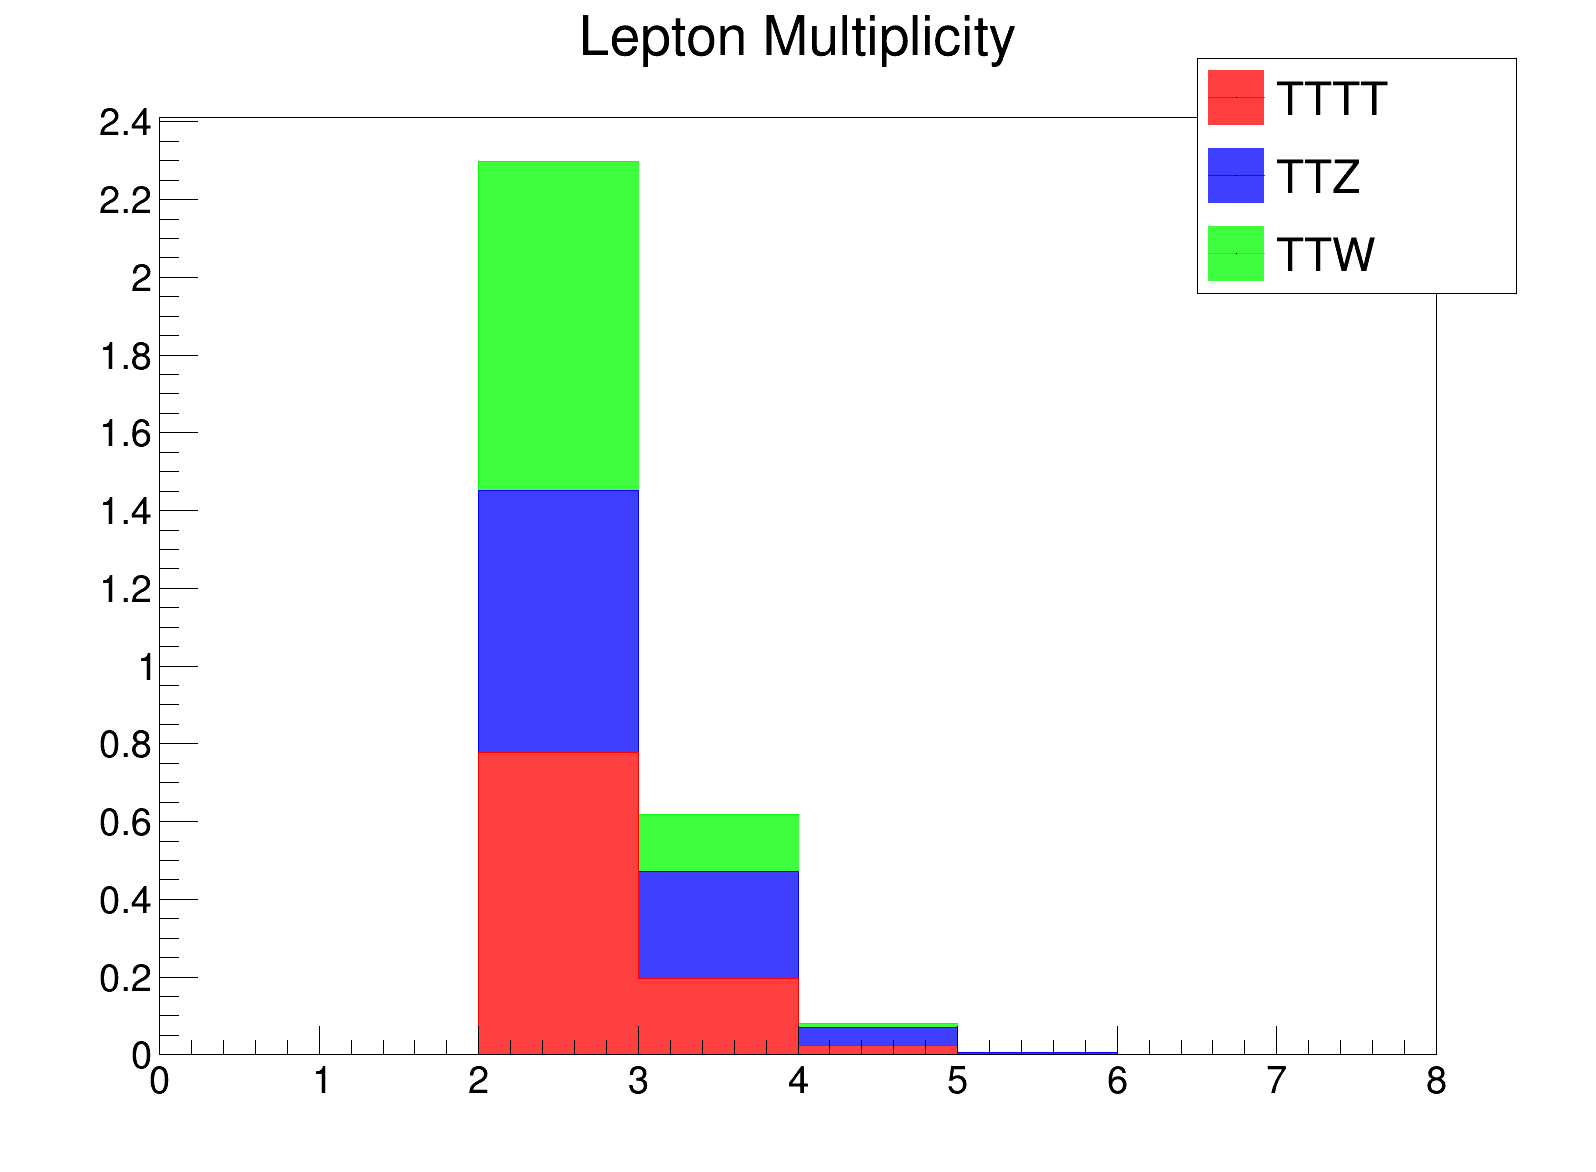

In [12]:
HC._canvas.Clear()
HC.stack_hist("lepton_count", title="Lepton Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)
HC._canvas.Draw()

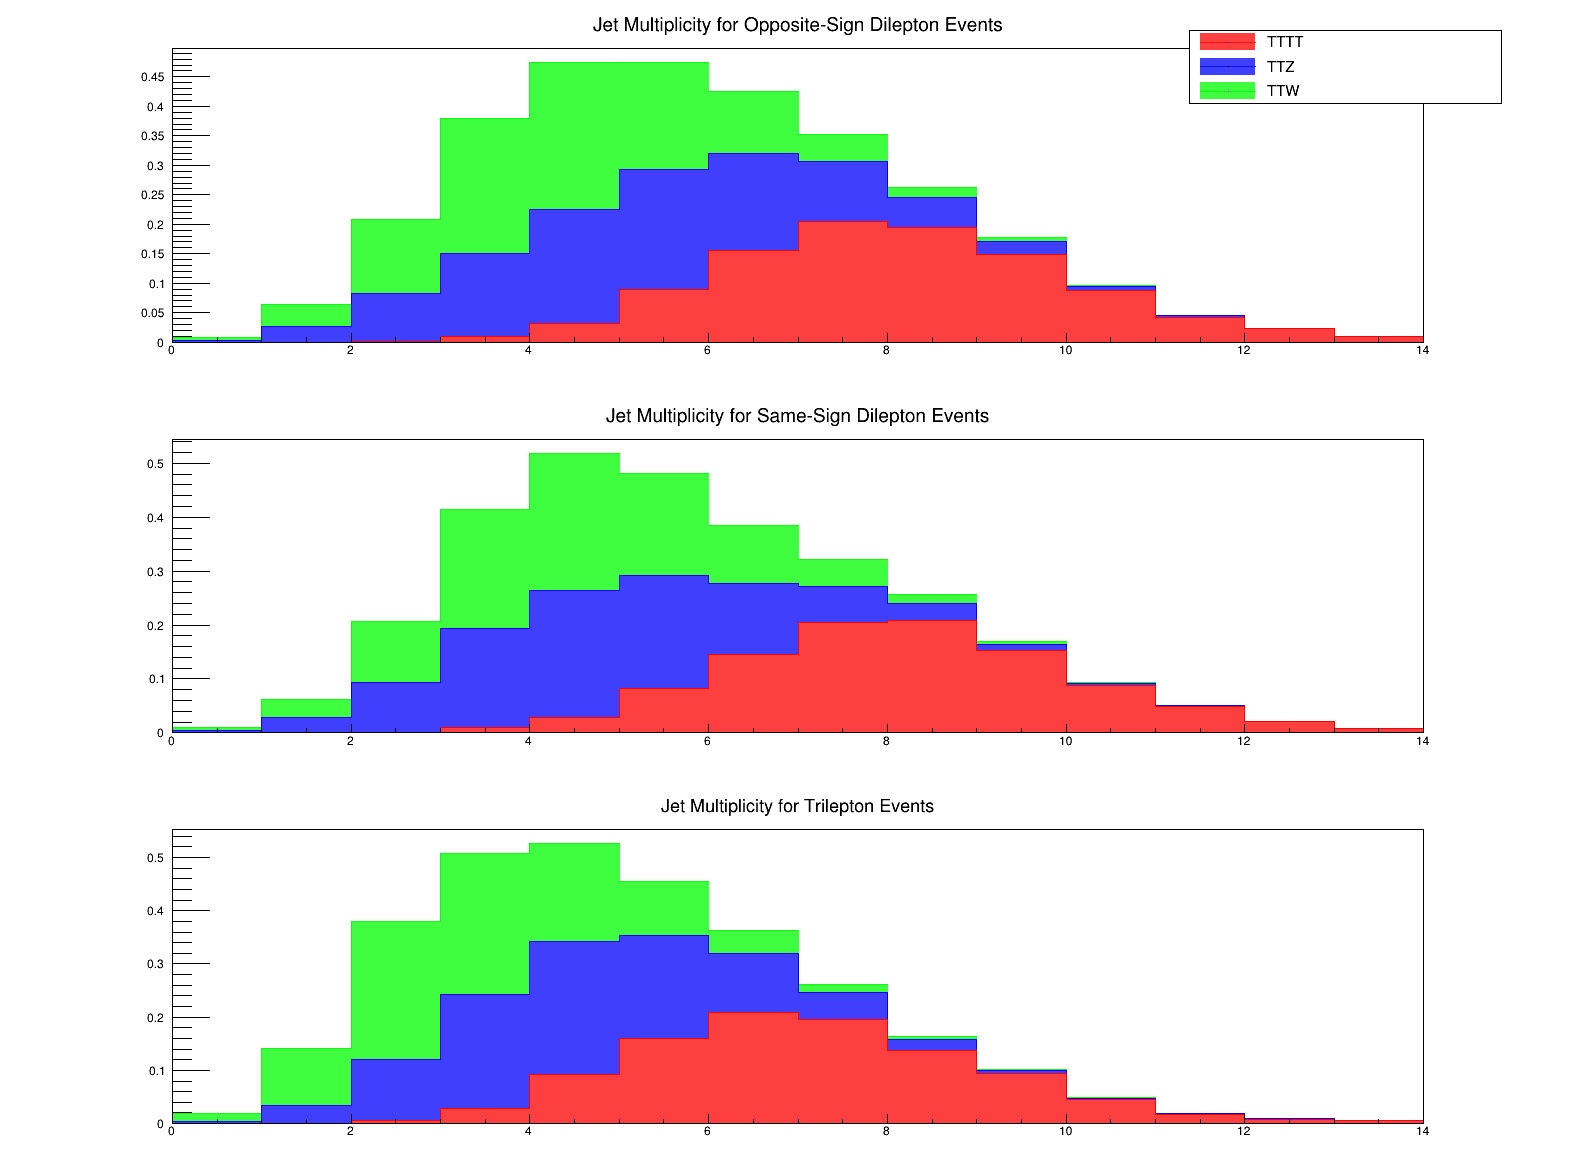

In [13]:
HC._canvas.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                       normalize_to=1,
                       enable_fill=True)
HC._canvas.Draw()

In [14]:
HC._canvas.Clear()
HC.stack_hist_array(*zip(('lepton_count','Count of leptons passing pre-selection'),
                         ('lepton_count_pass_miniiso','Count of leptons passing mini-iso Requirement'),
                        ),
                    normalize_to=1,
                    shape=(1,2),
                    enable_fill=True)
HC._canvas.Draw()

AttributeError: 'HistCollection' object has no attribute 'lepton_count_pass_miniiso'